# Простая линейная регрессия
В этом примере будет построена простая линия тренда с помощью уравнения $y = mx + b$. Такой способ является упрощённым, в будущем будет использоваться другой.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Данные
Будут использоваться данные из книги ISLR(Introduction to Statistical Learning: With Applications in R). Это будут продажи определённого продукта(в тысячах единиц), как функция от бюджета на ТВ, радио и в газетах(в тысячах долларов).

In [5]:
df = pd.read_csv('Advertising.csv')
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


**Есть ли связь между *общими* расходами на рекламу и *продажами*?**

Для начала создадим признак, который будет отражать все расходы на рекламу

In [8]:
df['total_spend'] = df['TV'] + df['radio'] + df['newspaper']
df.head()

,TV,radio,newspaper,sales,total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


В качестве целевой переменной y будет колонка sales, в качестве признака x - total_spend

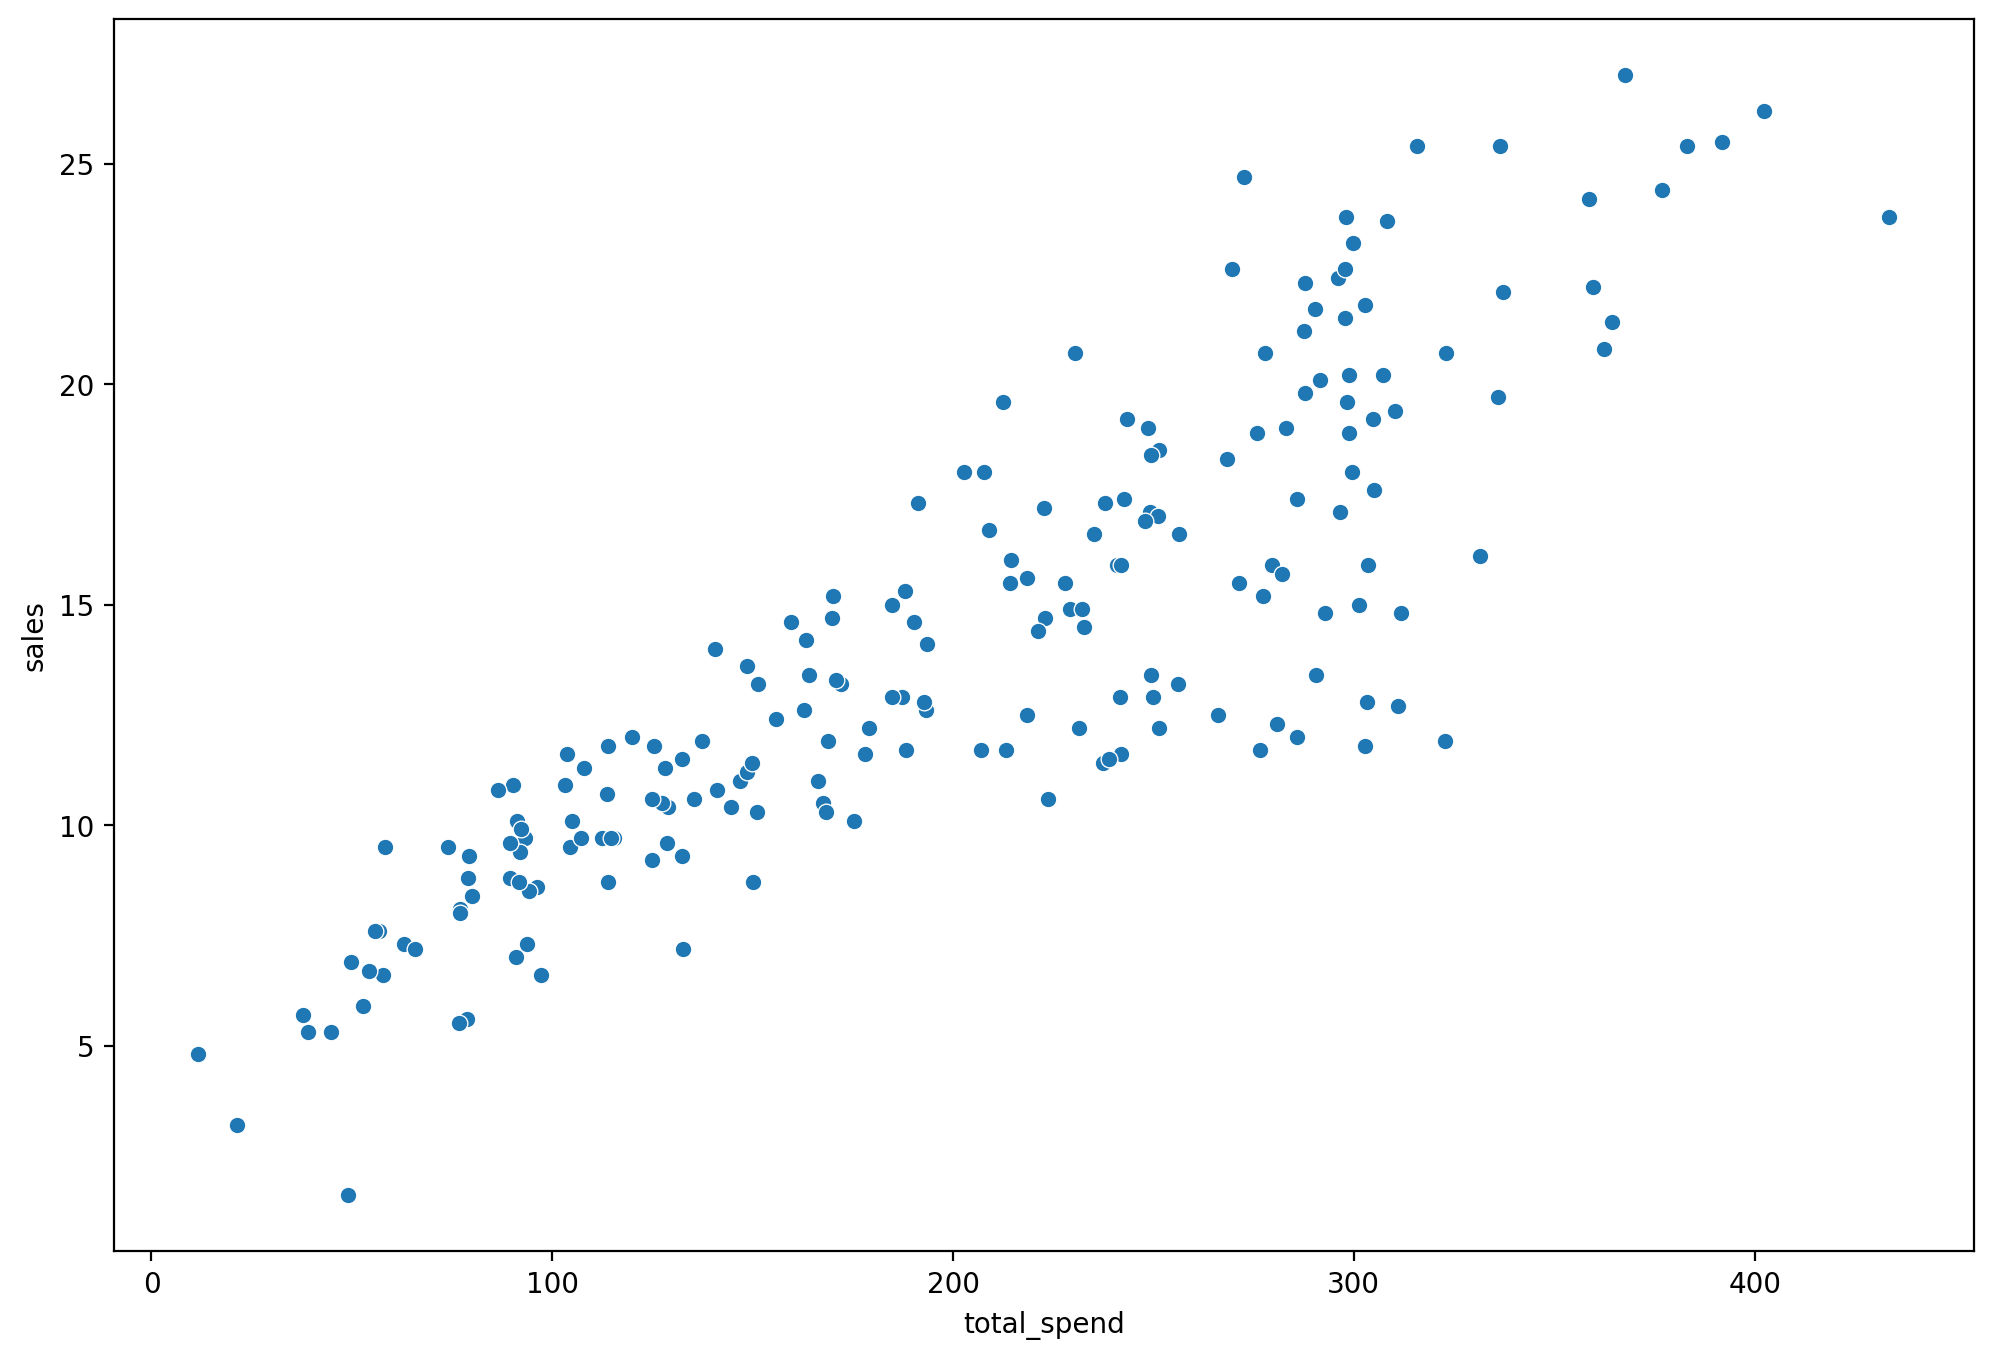

In [12]:
plt.figure(figsize=(12, 8), dpi=200)
sns.scatterplot(data=df, x='total_spend', y='sales')
plt.show()

Получаем достаточно линейную картину: чем больше денег тратися на рекламу, тем больше продажи товаров

## Линия наименьших квадратов
**На какой вопрос отвечает линия тренда.**
Если кто-то планирует потратить на рекламу $200 , то на какие продажи он может рассчитывать? Мы упростили постановку задачи, объединив все отдельные признаки в один признак "общие затраты на рекламу", но мы вернёмся чуть позже к задаче с несколькими признаками. Сейчас давайте убедимся, что мы понимаем, на какой вопрос может ответить линия линейной регрессии.

**В следующей рекламной кампании мы планируем всего потратить $200. Сколько единиц товара мы ожидаем продать благодаря этой рекламе?**

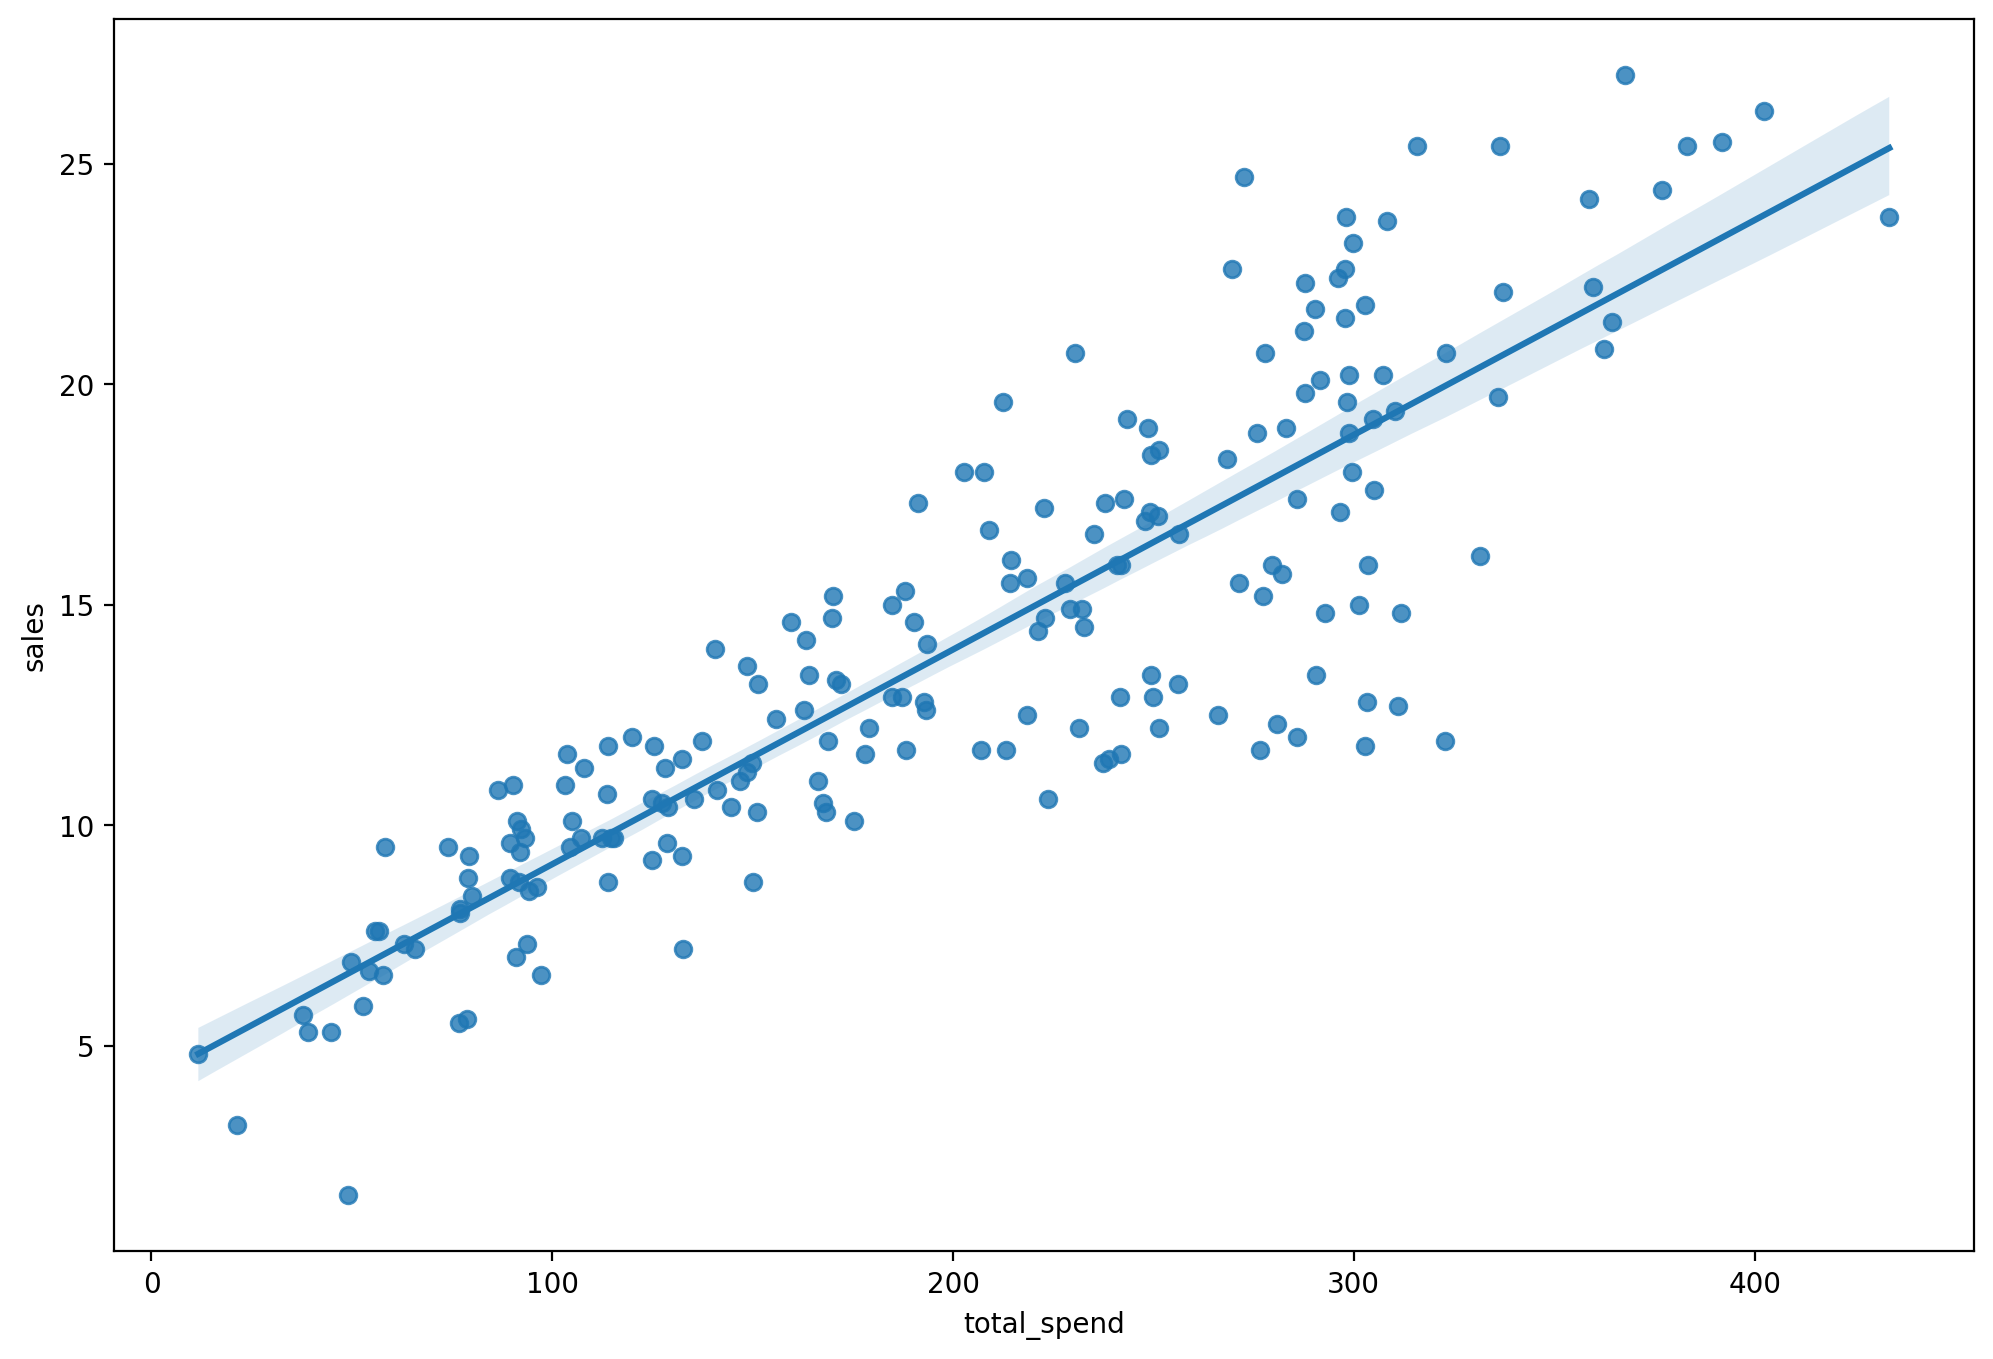

In [15]:
# По сути мы хотим выяснить, как мы можем нарисовать вот такую линию (которую рисует regplot)
plt.figure(figsize=(12, 8), dpi=200)
sns.regplot(data=df, x='total_spend', y='sales')
plt.show()

Для этого нам нужно решить следующее уравнение: $$y=mx+b$$

Здесь мы ищем коэффициенты m и b, т.е. решаем общую форму уравнения:

$$ \hat{y} = \beta_0 + \beta_1X$$

Здесь у нас есть матрицы значений - известная матрица продаж Y и известная матрица расходов на рекламу X. Неизвестными являются коэффициенты $\beta$, и в случае матриц это уже не одно число, а несколько чисел. Таким образом, мы работаем не с одним, а с несколькими признаками. Эти коэффициенты также помогут нам понять, какие из признаков обладают наибольшей возможностью предсказывать целевое значение Y. Здесь Y с галочкой сверху - это оценка (прогнозирование) целевого значения, а Y - это истинное значение, которое известно для некоторых точек.

Для решения уравнения мы можем использовать NumPy (при желании также можно решить уравнение [вручную](https://towardsdatascience.com/linear-regression-by-hand-ee7fe5a751bf)).

*Для признаков будем использовать X, т.к. далее для нескольких признаков именно так будет обозначаться матрица с признаками.*

In [22]:
X = df['total_spend']
y = df['sales']

### Функция np.polyfit
Эта функция использует МНК для построения полинома. Мы можем указать не просто X, но и X в более высоких степенях в квадрате, кубе и т.д.

In [25]:
help(np.polyfit)

Help on _ArrayFunctionDispatcher in module numpy:

polyfit(x, y, deg, rcond=None, full=False, w=None, cov=False)
    Least squares polynomial fit.
    
    .. note::
       This forms part of the old polynomial API. Since version 1.4, the
       new polynomial API defined in `numpy.polynomial` is preferred.
       A summary of the differences can be found in the
       :doc:`transition guide </reference/routines.polynomials>`.
    
    Fit a polynomial ``p(x) = p[0] * x**deg + ... + p[deg]`` of degree `deg`
    to points `(x, y)`. Returns a vector of coefficients `p` that minimises
    the squared error in the order `deg`, `deg-1`, ... `0`.
    
    The `Polynomial.fit <numpy.polynomial.polynomial.Polynomial.fit>` class
    method is recommended for new code as it is more stable numerically. See
    the documentation of the method for more information.
    
    Parameters
    ----------
    x : array_like, shape (M,)
        x-coordinates of the M sample points ``(x[i], y[i])``.
    y 

In [27]:
# Сначала возвращаются коэффициенты более высоких порядков (степеней полинома)!
np.polyfit(X, y, deg=1)

array([0.04868788, 4.24302822])

Мы получили набор коэффициентов $\beta$, сначала идет *b1*, затем *b0*. Теперь мы можем для каждого значения X предсказать целевую переменную y. Сделаем это с помощью линии регрессии.

In [31]:
# Создадим набор точек по оси x
# Потенциальные расходы бюджета в будущем
potential_spend = np.linspace(0, 500, 100)

In [33]:
# Для созданных точек выполним предсказание
predicted_sales = 0.04868788 * potential_spend + 4.24302822

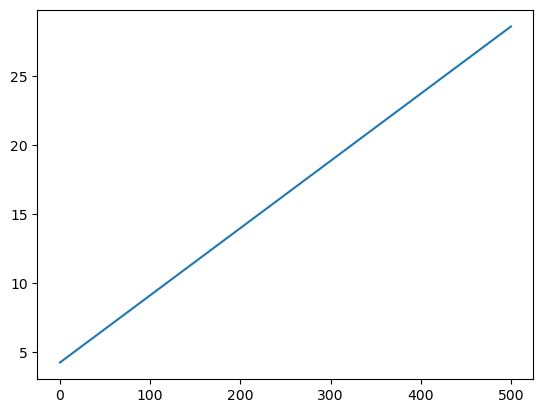

In [35]:
# Нанесем полученные данные на график
# По оси x - potential_spend, по оси y - predicted_sales
plt.plot(potential_spend, predicted_sales)
plt.show()

Получаем линию регрессии. Посмотрим как она ложится на наши данные.

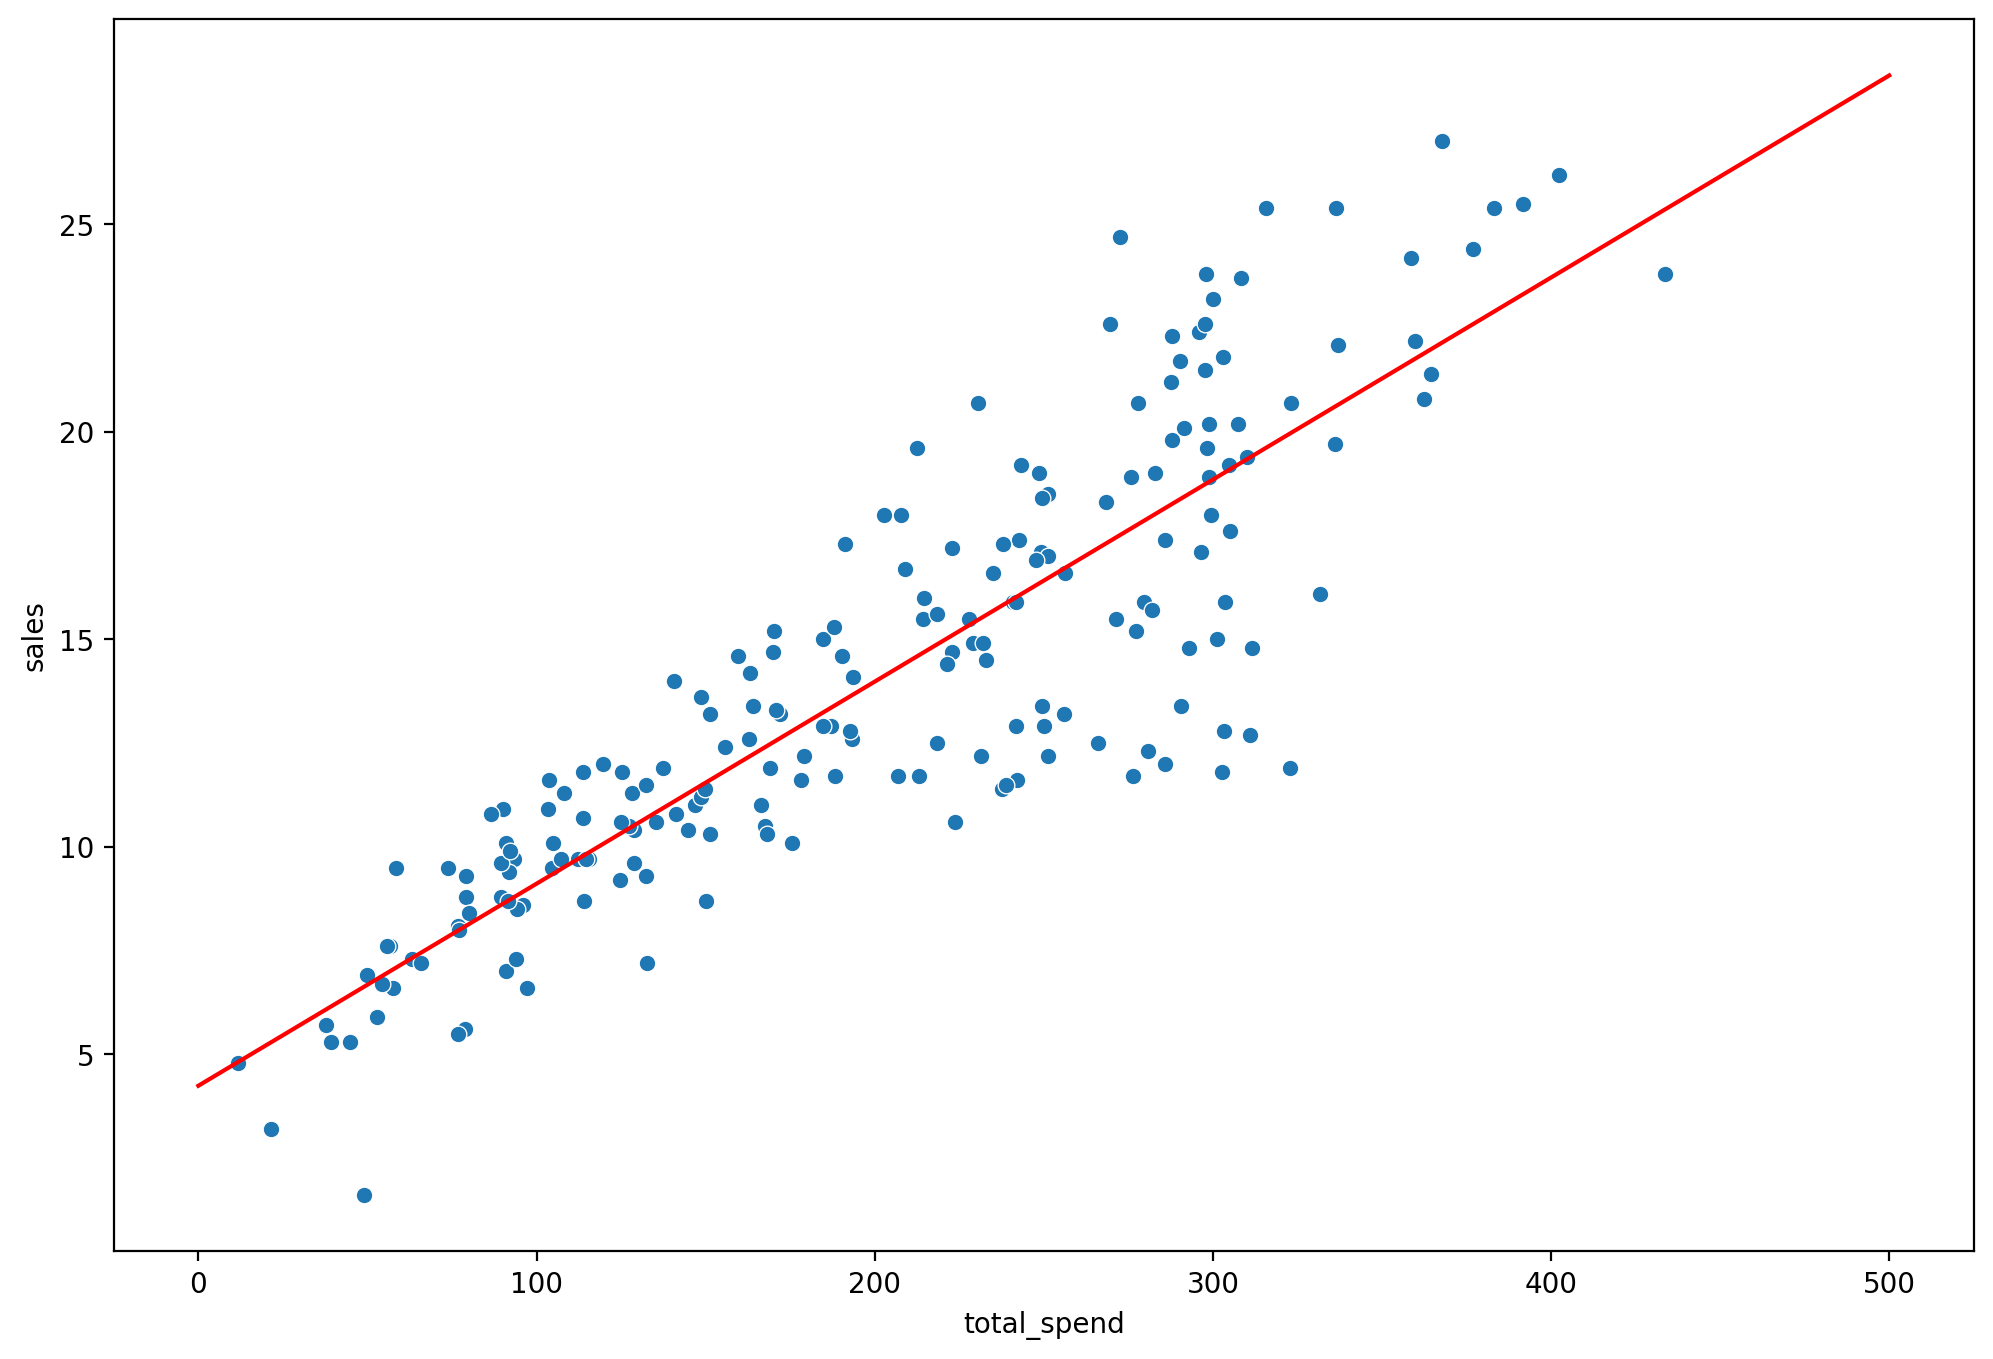

In [38]:
plt.figure(figsize=(12, 8), dpi=200)
sns.scatterplot(data=df, x='total_spend', y='sales')
plt.plot(potential_spend, predicted_sales, color='red')
plt.show()

**В следующей рекламной кампании мы планируем всего потратить $200. Сколько единиц товара мы ожидаем продать благодаря этой рекламе?**

In [41]:
spend = 200 
predicted_sale = 0.04868788 * spend + 4.24302822

In [43]:
predicted_sale

13.98060422

## Дополнительный вопросы, которые будут рассмотрены более подробно позже

### Переобучение (Overfitting), Недообучение (Underfitting) и измерение производительности

Мы использовали значение order=1, то есть прямую линию. При желании мы можем применить полиномы более высоких порядков, но станет ли предсказание лучше? Бывают ли ситуации, когда мы слишком хорошо обучили модель? Или слишком плохо? Как мы можем это узнать, и как вообще определить, хорошо или плохо выполнено обучение?

In [46]:
np.polyfit(X, y, 3)

array([ 3.07615033e-07, -1.89392449e-04,  8.20886302e-02,  2.70495053e+00])

Раньше наше уравнение имело вид: $$y = B1*x +B0$$

Теперь оно имеет вид: $$y = B3*x^3 + B2*x^2 + B1*x + B0$$

**Можем увидеть что x в первой степени намного важнее, чем x^2 или x^3 - т.к. их значения крайне малы**

In [49]:
# Потенциальные расходы бюджета в будущем
potential_spend = np.linspace(0, 500, 100)

In [51]:
predicted_sales = 3.07615033e-07*potential_spend**3 + -1.89392449e-04*potential_spend**2 + 8.20886302e-02*potential_spend**1 + 2.70495053e+00

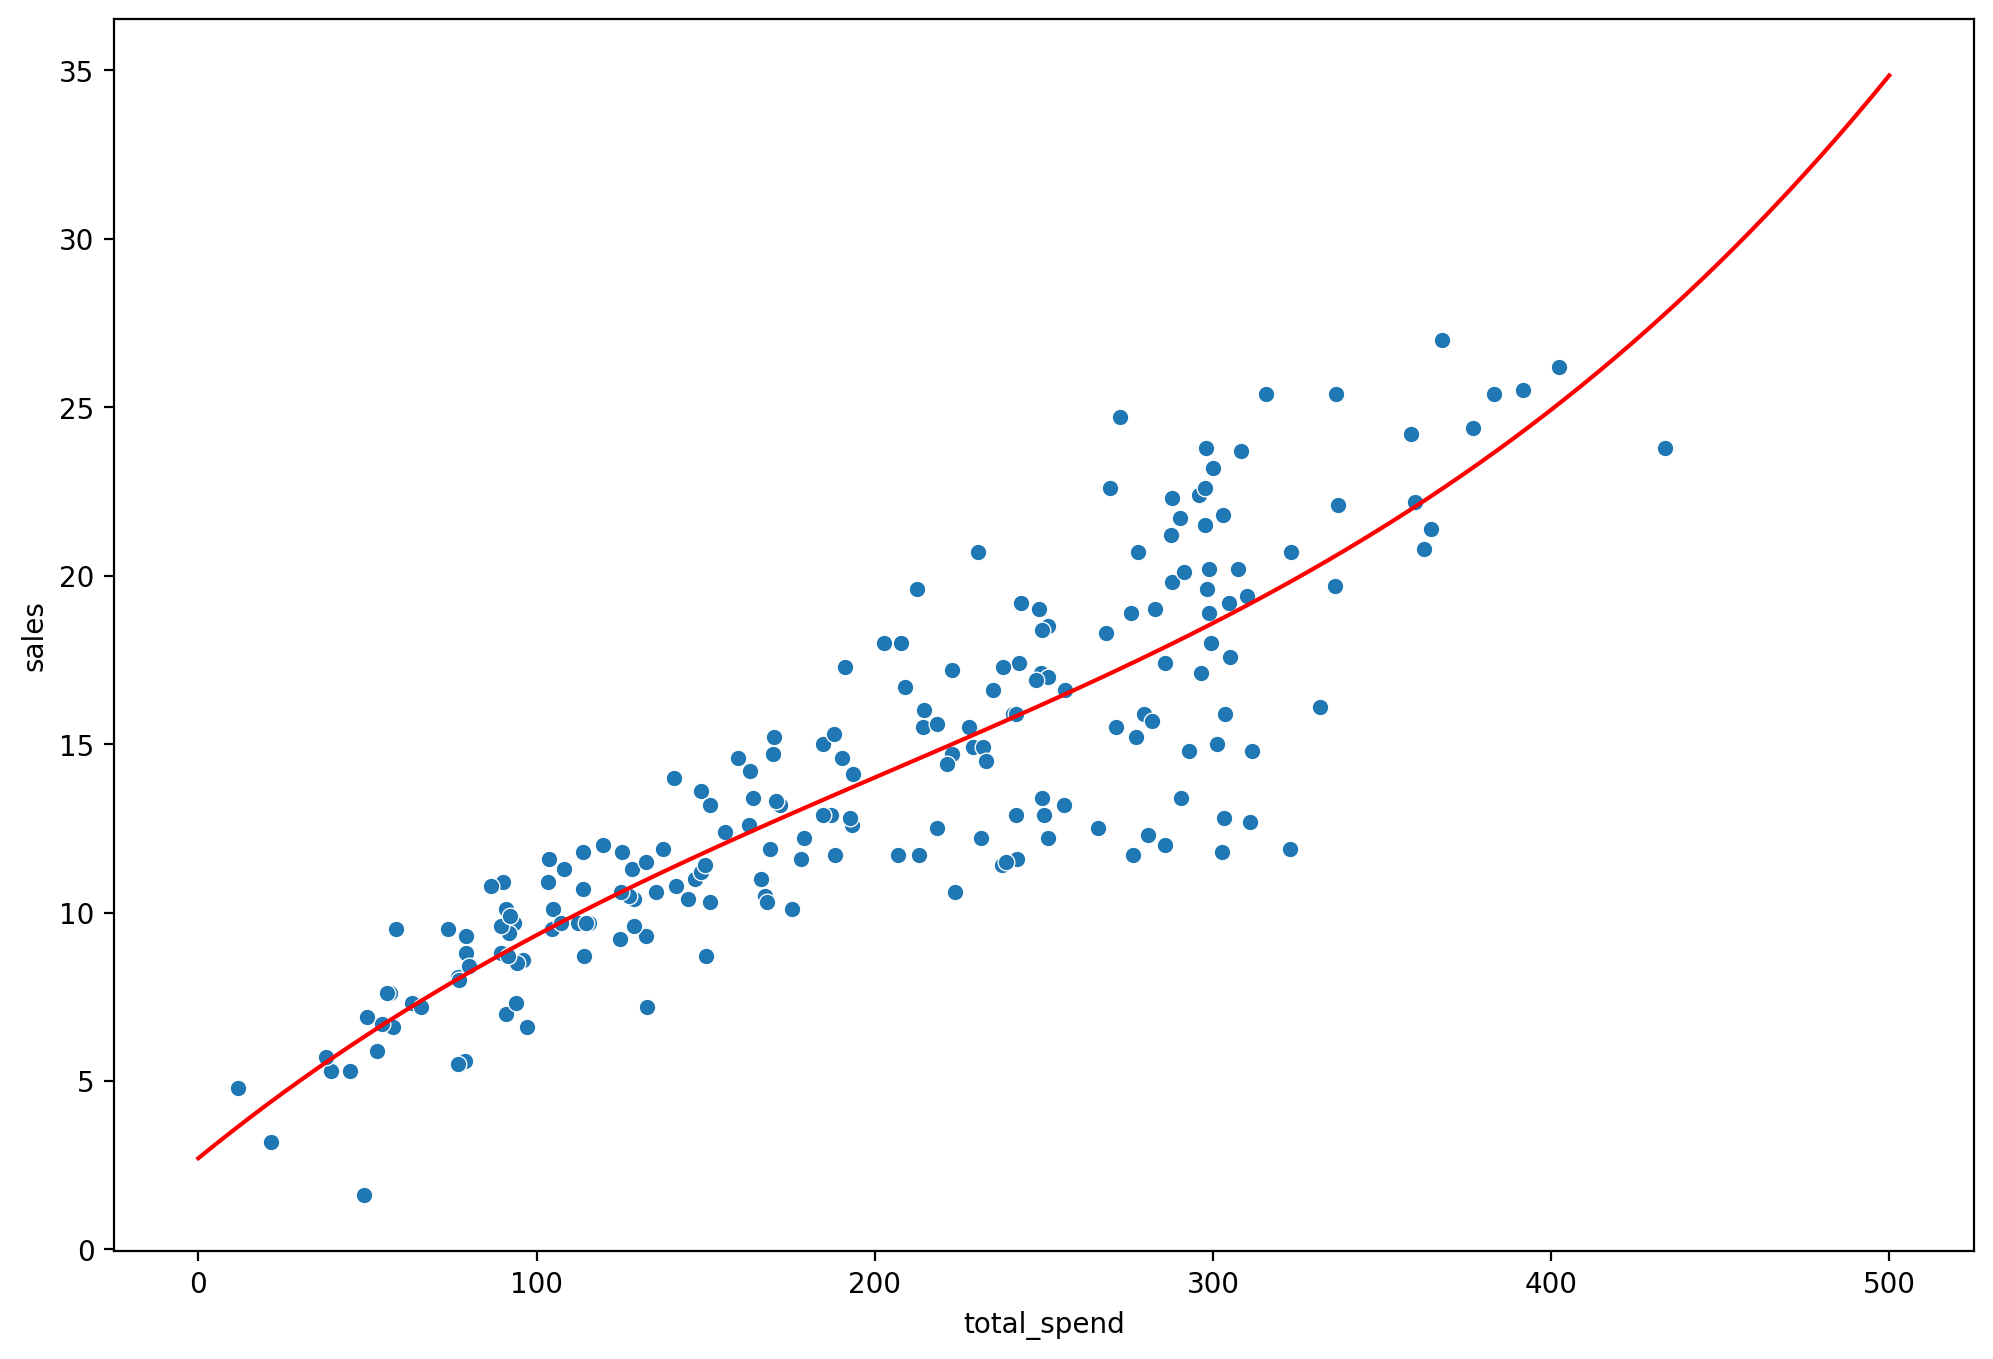

In [53]:
plt.figure(figsize=(12, 8), dpi=200)
sns.scatterplot(data=df, x='total_spend', y='sales')
plt.plot(potential_spend, predicted_sales, color='red')
plt.show()

## Несколько признаков
В исходных данных есть 3 признака, а не только общие расходы на рекламу. Сможем ли мы повторить процесс и получить более точные результаты?

In [57]:
X = df[['TV', 'radio', 'newspaper']]
y = df['sales']

In [59]:
# Здесь мы передаем в массиве X три отдельных признака
np.polyfit(X, y, 1) # эта команда приведет к ошибке

TypeError: expected 1D vector for x

**np.polyfit() работает только с одномерным массивом X!**